## Simple EDA before visualization ##

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl


import warnings
warnings.filterwarnings("ignore")

In [5]:
# write a f' to print out the current version of each package
print(f'numpy : {np.__version__}')
print(f'pandas : {pd.__version__}')
print(f'seaborn : {sns.__version__}')
print(f'matplotlib : {mpl.__version__}')

numpy : 1.17.2
pandas : 0.25.1
seaborn : 0.9.0
matplotlib : 3.1.1


In [6]:
# for clean visualization, set matplotlib config
plt.rc('font', size = 12)
plt.rc('axes', titlesize = 14)
plt.rc('axes', labelsize = 12)
plt.rc('xtick', labelsize = 12)
plt.rc('ytick', labelsize = 12)
plt.rc('legend', fontsize = 12)
plt.rc('figure', titlesize = 14)
plt.rcParams['figure.dpi'] = 300
sns.set_style('whitegrid')

In [7]:
# load the dataset, and inspect
nflx = pd.read_csv('/Users/BrendanErhard/Desktop/Python/Kaggle/netflix_titles.csv')
print(nflx.shape)

(6234, 12)


In [14]:
# figure out for each column/feature, the # of null values
for i in nflx.columns:
    null_rate = nflx[i].isna().sum() / len(nflx) * 100
    if null_rate > 0:
        print(f"{i}'s null rate: {null_rate:.1f}%")

director's null rate: 31.6%
cast's null rate: 9.1%
country's null rate: 7.6%
date_added's null rate: 0.2%
rating's null rate: 0.2%


**Of the 12 features cross 6,234 movies, director, cast and country have a lot of missing the data**

In [15]:
# inspect the data closer
nflx.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [16]:
# take a look at the unique count and frequency
nflx.describe(include='all').head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,6.234000e+03,6234,6234,4265,5664,5758,6223,6234.00000,6224,6234,6234,6234
unique,NaN,2,6172,3301,5469,554,1524,NaN,14,201,461,6226
top,NaN,Movie,Tunnel,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,A surly septuagenarian gets another chance at ...
freq,NaN,4265,3,18,18,2032,122,NaN,2027,1321,299,3
mean,7.670368e+07,NaN,NaN,NaN,NaN,NaN,NaN,2013.35932,NaN,NaN,NaN,NaN


In [19]:
# clean up the columns and data
# extract the year of the film by splitting the data and taking the last value ([-1])
nflx = nflx.fillna('NULL')
nflx['Year_added'] = nflx['date_added'].apply(lambda x: x.split(',')[-1])
nflx['Year_added'] = nflx['Year_added'].apply(lambda x: x if x!= 'NULL' else '2020')
nflx['Year_added'] = nflx['Year_added'].apply(int)

nflx.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Year_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019
1,80117401,Movie,Jandino: Whatever it Takes,NULL,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016
2,70234439,TV Show,Transformers Prime,NULL,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",2018
3,80058654,TV Show,Transformers: Robots in Disguise,NULL,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,2018
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017


In [21]:
# rem
movie = nflx[nflx['type'] == 'Movie']
tv_show = nflx[nflx['type'] == 'TV Show']
nflx.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Year_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019
1,80117401,Movie,Jandino: Whatever it Takes,NULL,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016
2,70234439,TV Show,Transformers Prime,NULL,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",2018
3,80058654,TV Show,Transformers: Robots in Disguise,NULL,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,2018
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017


## Which country produces the most content?##

In [23]:
from collections import Counter
country_data = nflx['country']
country_counting = pd.Series(dict(Counter(
    ','.join(country_data).replace(',', ',').replace(',',',').split(',')))).sort_values(ascending=False)
country_counting.drop(['NULL'], axis=0)


United States     2302
India              808
United Kingdom     483
 United States     308
Canada             206
                  ... 
 Panama              1
 Latvia              1
 Uganda              1
Slovenia             1
Cyprus               1
Length: 173, dtype: int64

In [36]:
total = sum(country_counting)
top20 = sum(country_counting[:20])

print(f'total: {total}')
print(f'top 20 countries : {top20}')
print(f"percentage: {top20}/{total} = {100 * top20/total}%")

total: 7658
top 20 countries : 6137
percentage: 6137/7658 = 80.13841734134239%


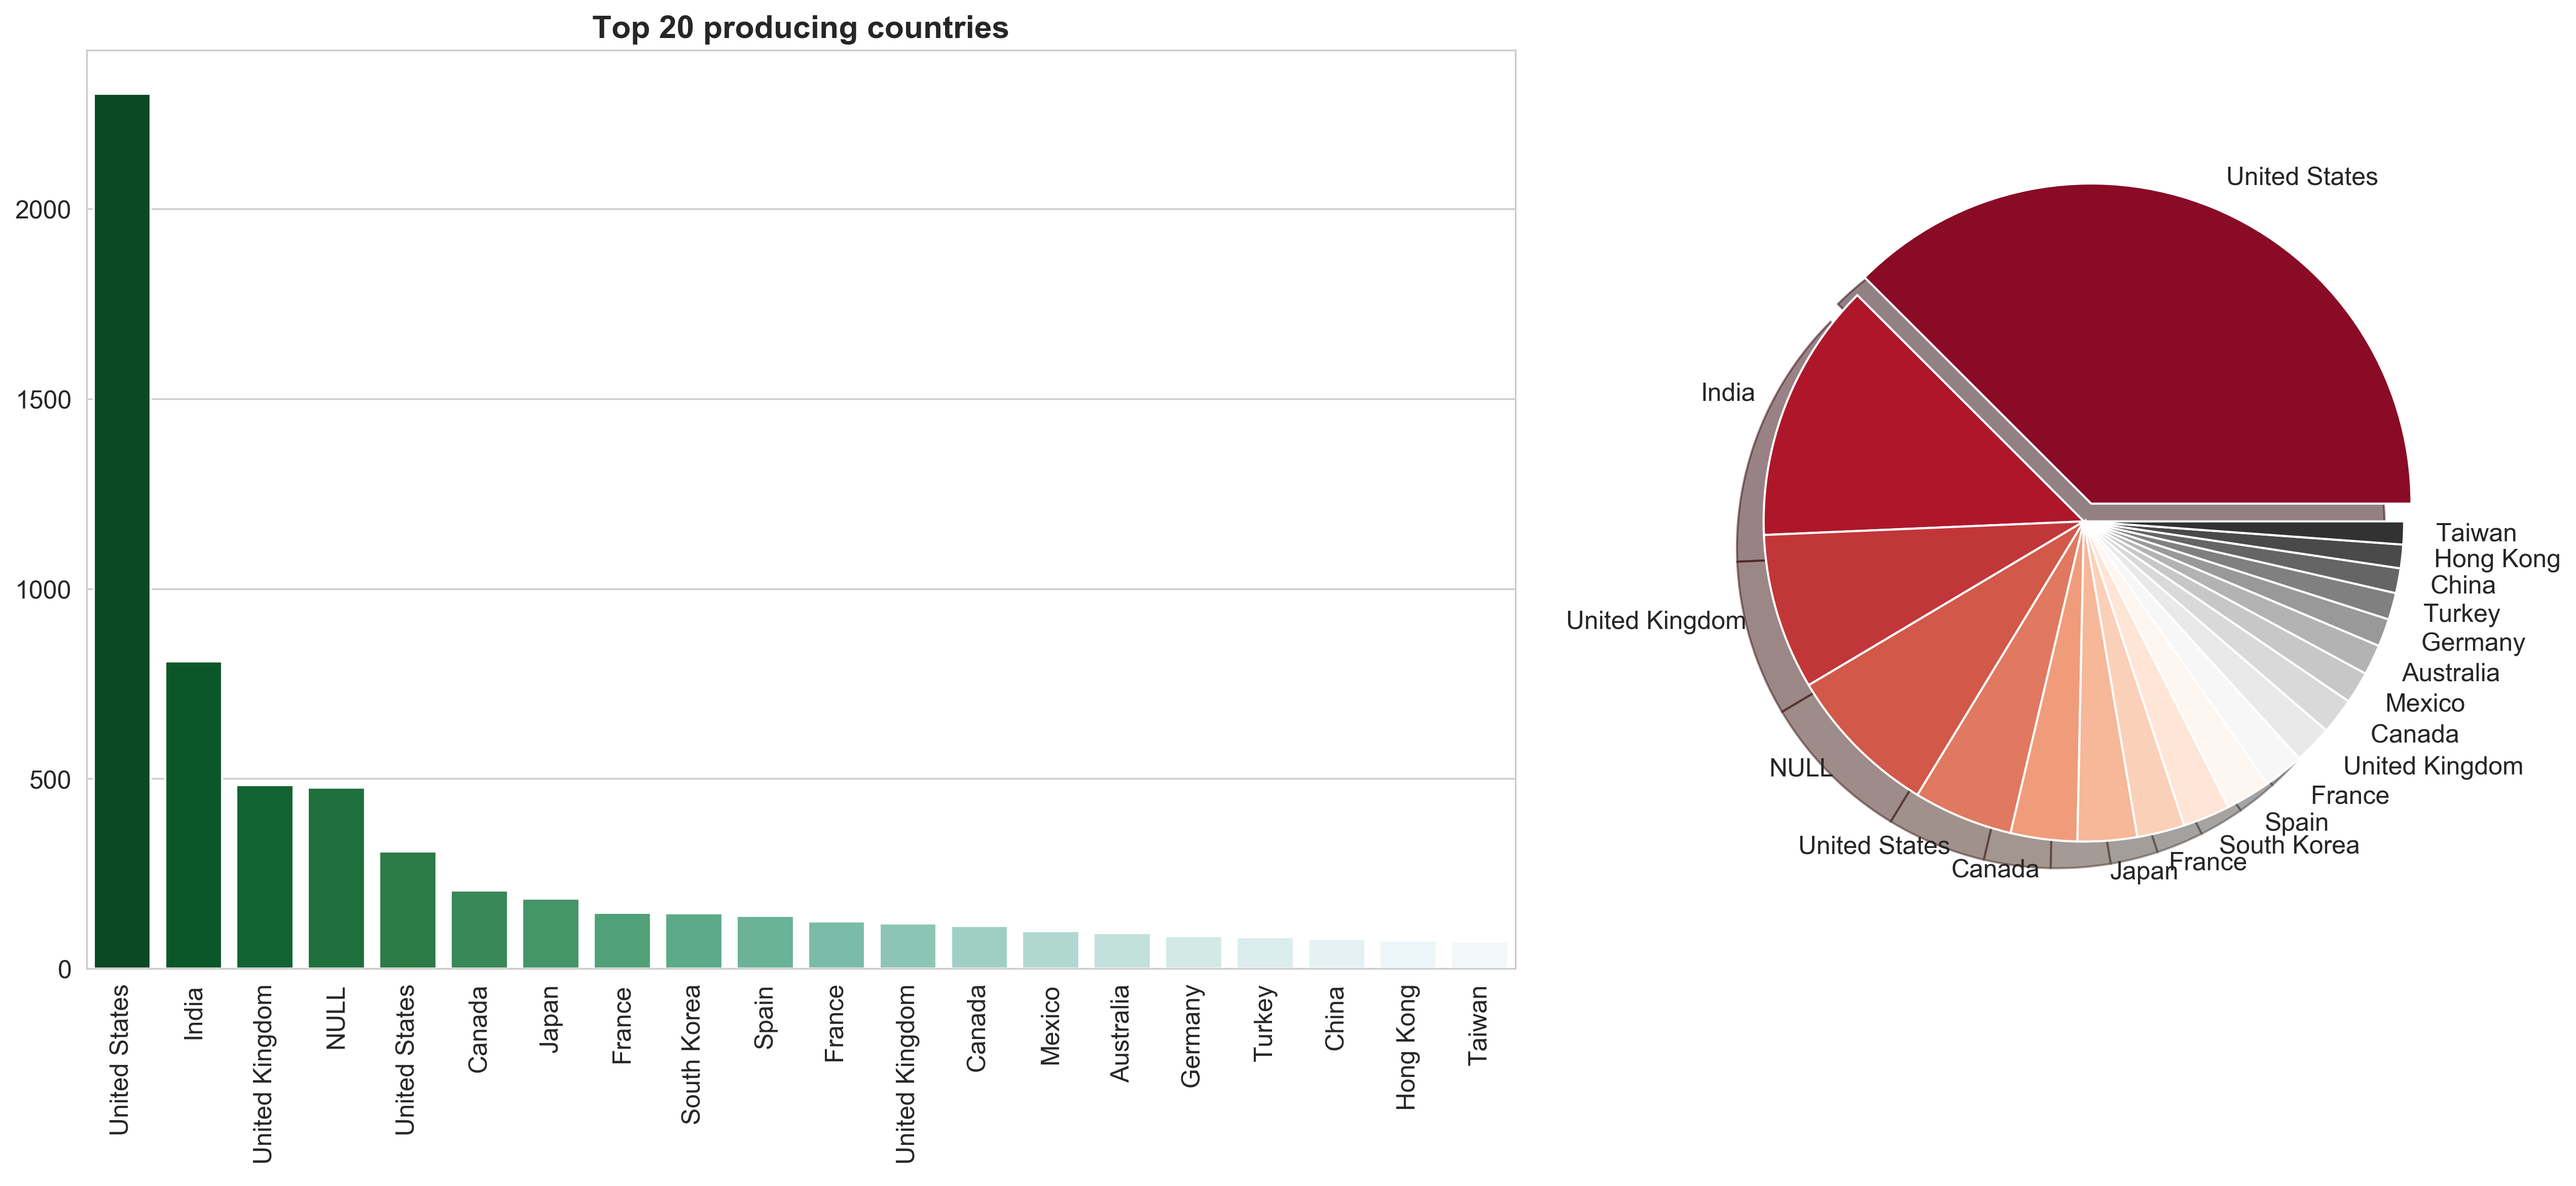

In [46]:
top20_country = country_counting[:20]

from matplotlib import gridspec
fig = plt.figure(figsize = (20, 8))
gs = gridspec.GridSpec(nrows=1, ncols=2,
                      height_ratios = [6],
                      width_ratios = [10,5])
ax = plt.subplot(gs[0])
sns.barplot(top20_country.index, top20_country, ax=ax, palette='BuGn_r')
ax.set_xticklabels(top20_country.index, rotation='90')
ax.set_title('Top 20 producing countries', fontsize = 15, fontweight = 'bold')

explode = [0 for _ in range(20)]
explode[0] = 0.06

ax2  = plt.subplot(gs[1])
ax2.pie(top20_country, labels = top20_country.index,
       shadow = True, startangle = 0, explode=explode,
       colors = sns.color_palette('RdGy', n_colors=20))
ax2.axis('equal')
plt.show()


In [49]:
# make a wafflegraph
import squarify

y = top20_country
fig = plt.figure(
    FigureClass = Waffle,
    rows = 13,
    columns = 21,
    values = y,
    labels=["{}({})".format(a, b) for a, b in zip(y.index, y) ],
    colors=sns.color_palette("RdGy", n_colors=20),
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.3), 'ncol': len(y)//4,  'framealpha': 0},
    font_size=15, 
    figsize=(12, 12),  
    icon_legend=True
)

plt.title('Top 20 producing countries', position=(0.5, 1.0+0.03), fontsize = 15, fontweight='bold')
plt.show()


ModuleNotFoundError: No module named 'squarify'

In [50]:
year_country = data2.groupby('year_added')['country'].value_counts().reset_index(name='counts')
year_country['top20'] = year_country['country'].apply(lambda x : x in top20_country.index)

year_country = year_country[(year_country['year_added'] >= 1990) & year_country['top20'] & (year_country['year_added'] < 2020)]

alt.Chart(year_country).mark_area().encode(
    alt.X('year_added'),
    alt.Y('counts:Q', stack='center', axis=None),
    alt.Color('country:N',
        scale=alt.Scale(scheme='redgrey'),
        sort=list(top20_country.index)
    ),
).properties(
    height=350,
    width=600
)

NameError: name 'data2' is not defined